In [1]:
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip

from helper import Helper
from thresholder import Thresholder
from calibrator import Calibrator
from transformer import Transformer
from lane_finder import LaneFinder

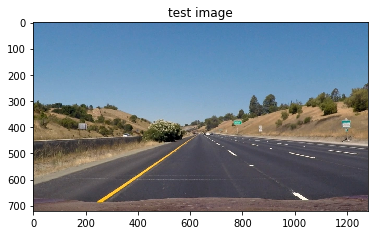

In [2]:
h = Helper()
img = h.load_image('../test_images/straight_lines1.jpg')
old_img = img
h.plot_image(old_img, 'test image')

corners found. please check self.imgpoints
stored calib coeffs @ ../data/calib_coeffs.pickle


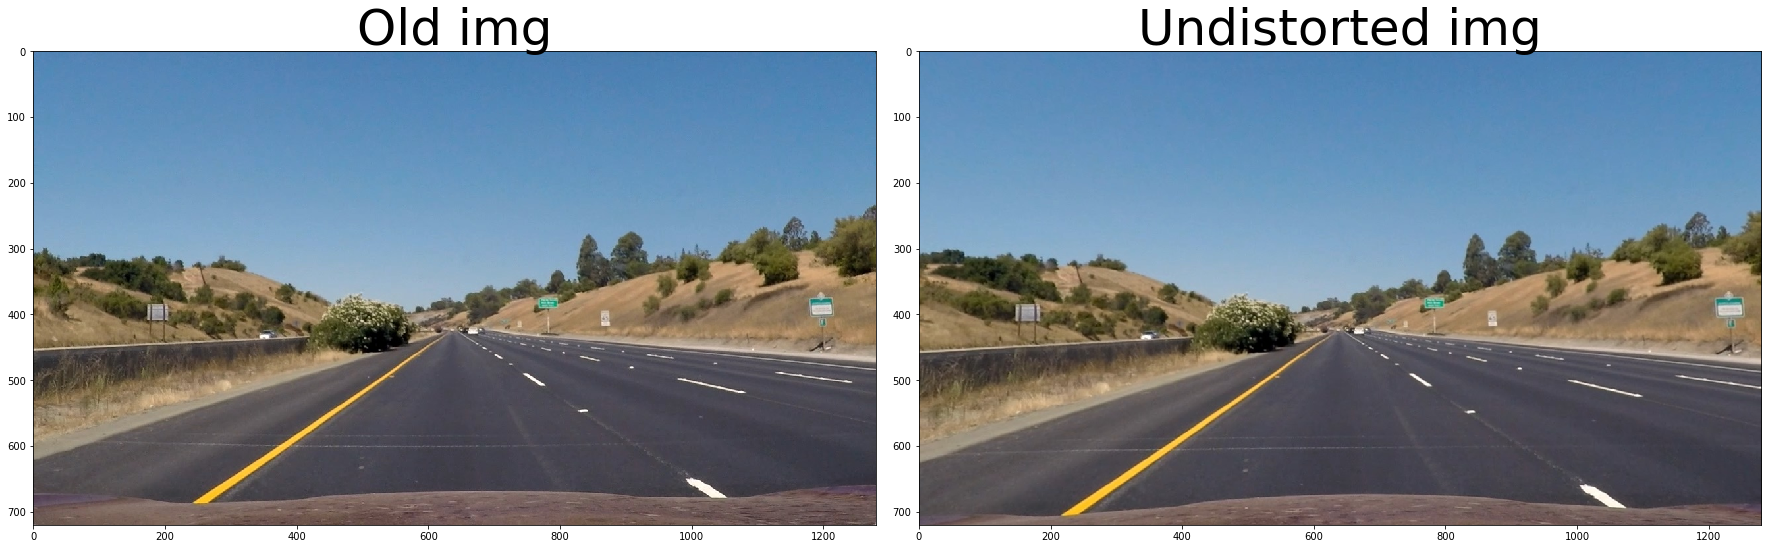

In [3]:

cal = Calibrator(x_corners=9, y_corners=6)

calib_images_path = '../camera_cal/*.jpg'
cal.compute_img_pts(calib_images_path, False)

test_image_path = '../camera_cal/calibration1.jpg'
cal.calibrate_camera(test_image_path)

cal.store_calib_coeffs('../data/calib_coeffs.pickle')

und_img = cal.undistort_image(img)
h.parallel_plots(img, 'Old img', und_img, 'Undistorted img')

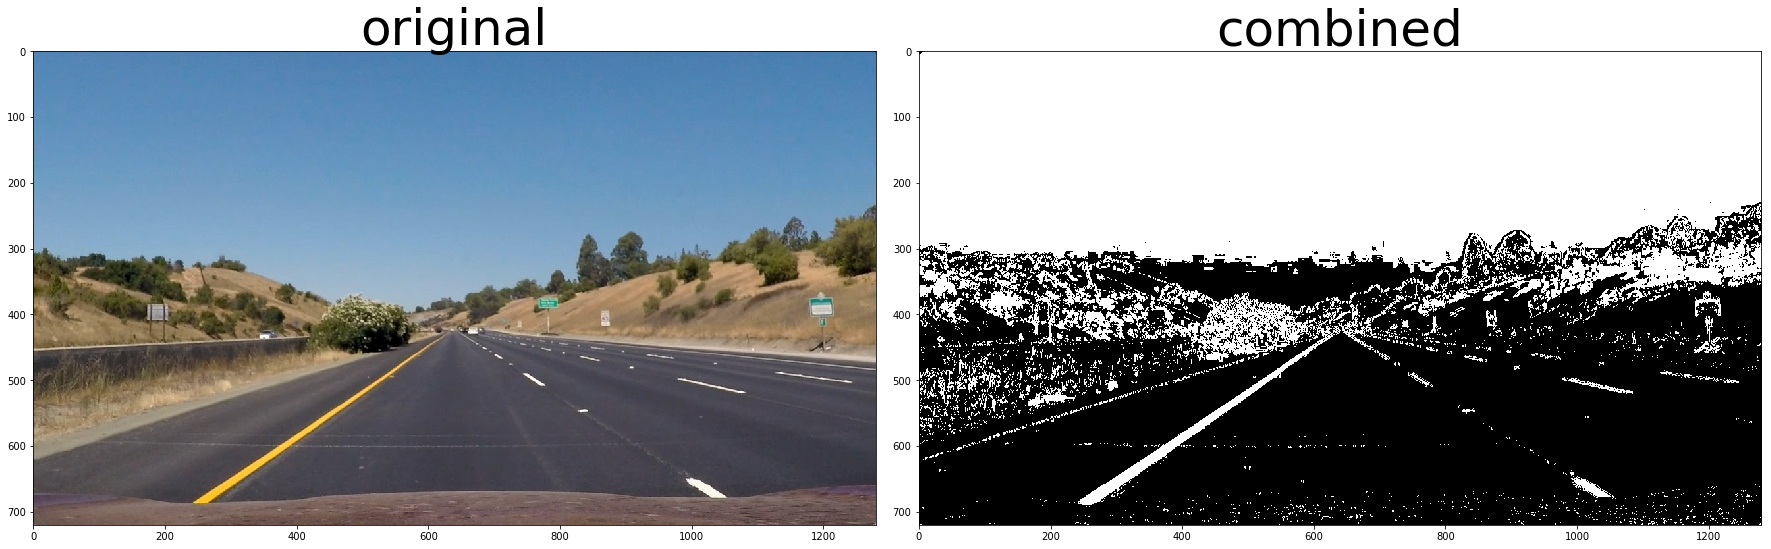

In [4]:
th = Thresholder()

ksize=3
s_thres = th.hls_threshold(img, thresh=(90, 255))
gradx = th.absolute_threshold(img, orient='x', thresh_min=20, thresh_max=100, sobel_kernel=ksize)
#grady = t.absolute_threshold(img, orient='y', thresh_min=20, thresh_max=100, sobel_kernel=ksize)
mag_binary = th.magnitude_threshold(img, sobel_kernel=ksize, mag_thresh=(20, 100))
dir_binary = th.direction_threshold(img, sobel_kernel=ksize, thresh=(0.7, 1.3))

bin_img = np.zeros_like(dir_binary)
bin_img[((gradx == 1)) | ((mag_binary == 1) & (dir_binary == 1)) | (s_thres == 1)] = 1
h.parallel_plots(img,'original', bin_img, 'combined', None, 'gray')

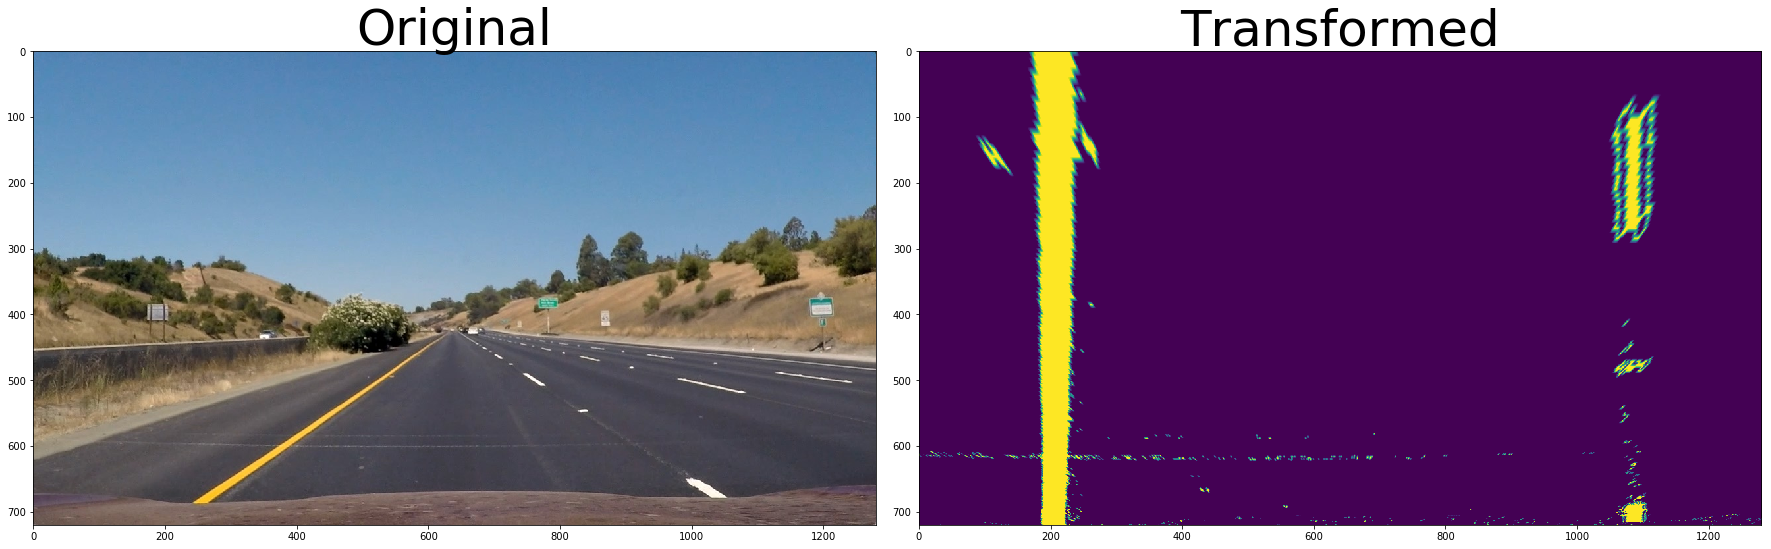

In [5]:
tr = Transformer()
corners = [(525, 499), (760, 499), (1047, 684), (253, 684)]
bin_warped = tr.transform(bin_img,corners , offset=200)

h.parallel_plots(img, 'Original', bin_warped, 'Transformed')

(1280,)

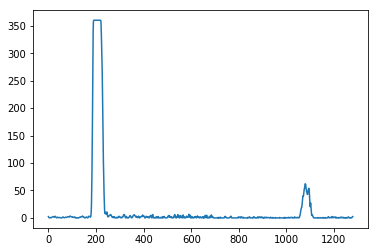

In [6]:
l = LaneFinder()
histogram = l.hist(bin_warped)
plt.plot(histogram)
histogram.shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


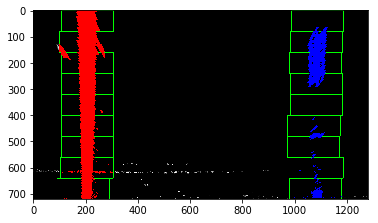

In [7]:
img, fits = l.fit_polynomial(bin_warped)
plt.imshow(img)

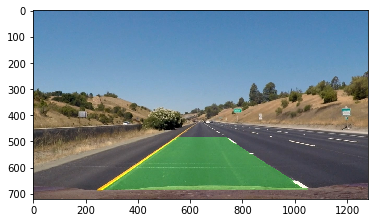

In [8]:
plt.imshow(l.overlay_lane(old_img, l.left_fit, l.right_fit, tr))

In [9]:
def pp(img):

    und_img = cal.undistort_image(img)
    
    ksize=3
    s_thres = th.hls_threshold(und_img, thresh=(90, 255))
    gradx = th.absolute_threshold(und_img, orient='x', thresh_min=20, thresh_max=100, sobel_kernel=ksize)
    #grady = t.absolute_threshold(img, orient='y', thresh_min=20, thresh_max=100, sobel_kernel=ksize)
    mag_binary = th.magnitude_threshold(und_img, sobel_kernel=ksize, mag_thresh=(20, 100))
    dir_binary = th.direction_threshold(und_img, sobel_kernel=ksize, thresh=(0.7, 1.3))

    bin_img = np.zeros_like(dir_binary)
    bin_img[((gradx == 1)) | ((mag_binary == 1) & (dir_binary == 1)) | (s_thres == 1)] = 1
    
    corners = [(525, 499), (760, 499), (1047, 684), (253, 684)]
    bin_warped = tr.transform(bin_img,corners , offset=200)
    
    img, fits = l.fit_polynomial(bin_warped)
    
    result = l.overlay_lane(und_img, l.left_fit, l.right_fit, tr)
    
    return result
    

In [ ]:
clip1 = VideoFileClip('../project_video.mp4')
video_clip = clip1.fl_image(pp)
video_clip.write_videofile('tmo_op.mp4', audio=False)


t:   0%|          | 0/1260 [00:00<?, ?it/s, now=None]

Moviepy - Building video tmo_op.mp4.
Moviepy - Writing video tmo_op.mp4



t:  82%|████████▏ | 1032/1260 [12:59<03:18,  1.15it/s, now=None]